In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway


In [34]:
df = pd.read_csv("/content/drive/MyDrive/Đồ án môn IE224-Phân tích thông tin/cleaned_data.csv")
df.head(30)

,Name,Manufacturer,Brand,Condition,Price,Warranty_type,Warranty_time,Architecture,Max_resolution,Base_clock,...,Bus_width,Bandwidth,Cores,Length,Width,Height,Bus_interface,TDP,OpenGL,DirectX
0,RX570 PowerColor,Powercolor,AMD,Đã qua sử dụng,600000,Không có bảo hành,0,GCN 4.0,4096x2160,1168,...,256,224.0,2048,255.0,137.0,47.000000,PCIe 3.0 x16,150,4.6,12
1,RX 6700 XT MECH 2X OC,Msi,AMD,Đã qua sử dụng,4500000,Bảo hành hãng,2,RDNA 2.0,7680x4320,2375,...,192,384.0,2560,247.0,131.0,51.000000,PCIe 4.0 x16,230,4.6,12 Ultimate
2,RX 6700 XT MECH 2X OC,Msi,AMD,Đã qua sử dụng,4730000,Bảo hành hãng,12,RDNA 2.0,7680x4320,2375,...,192,384.0,2560,247.0,131.0,51.000000,PCIe 4.0 x16,230,4.6,12 Ultimate
3,ASRock RX 6800,Asrock,AMD,Đã qua sử dụng,6450000,Không có bảo hành,0,RDNA 2.0,7680x4320,1700,...,256,512.0,3840,267.0,120.0,40.000000,PCIe 4.0 x16,250,4.6,12 Ultimate
4,MSI RX 6650 XT 8gb OC,Msi,AMD,Đã qua sử dụng,6000000,Bảo hành hãng,34,RDNA 2.0,4096x2160,2055,...,128,280.3,2048,277.0,130.0,51.000000,PCIe 4.0 x8,176,4.6,12 Ultimate
5,MSI Radeon RX 6600XT 8G GAMING X,Msi,AMD,Đã qua sử dụng,3800000,Bảo hành hãng,12,RDNA 2.0,4096x2160,2064,...,128,256.0,2048,277.0,130.0,51.000000,PCIe 4.0 x8,160,4.6,12 Ultimate
6,Sapphire PULSE RX 5600 XT,Sapphire,AMD,Đã qua sử dụng,2300000,Không có bảo hành,0,RDNA 1.0,4096x2160,1400,...,192,336.0,2304,254.0,135.0,47.000000,PCIe 4.0 x16,150,4.6,12
7,ASRock RX 6600 Challenger D,Asrock,AMD,Đã qua sử dụng,3300000,Không có bảo hành,0,RDNA 2.0,7680x4320,1626,...,128,224.0,1792,269.0,132.0,41.000000,PCIe 4.0 x8,132,4.6,12 Ultimate
8,GIGABYTE RX 6600 XT GAMING OC PRO,Gigabyte,AMD,Đã qua sử dụng,7500000,Không có bảo hành,0,RDNA 2.0,7680x4320,1968,...,128,256.0,2048,282.0,115.0,50.000000,PCIe 4.0 x8,160,4.6,12 Ultimate
9,MSI RX 6600 ARMOR,Msi,AMD,Đã qua sử dụng,2800000,Bảo hành hãng,12,RDNA 2.0,7680x4320,1626,...,128,224.0,1792,238.0,128.0,39.000000,PCIe 4.0 x8,132,4.6,12 Ultimate


In [27]:
# Hiển thị thông tin cơ bản về dữ liệu
info = df.info()

# Tính toán một số thống kê mô tả cơ bản
description = df.describe()

info, description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            115 non-null    object 
 1   Manufacturer    115 non-null    object 
 2   Brand           115 non-null    object 
 3   Condition       115 non-null    object 
 4   Price           115 non-null    int64  
 5   Warranty_type   115 non-null    object 
 6   Warranty_time   115 non-null    int64  
 7   Architecture    115 non-null    object 
 8   Max_resolution  115 non-null    object 
 9   Base_clock      115 non-null    int64  
 10  Boost_clock     115 non-null    float64
 11  Memory_clock    115 non-null    int64  
 12  Memory_size     115 non-null    float64
 13  Memory_type     115 non-null    object 
 14  Bus_width       115 non-null    int64  
 15  Bandwidth       115 non-null    float64
 16  Cores           115 non-null    int64  
 17  Length          115 non-null    flo

(None,
               Price  Warranty_time   Base_clock  Boost_clock  Memory_clock  \
 count  1.150000e+02     115.000000   115.000000   115.000000    115.000000   
 mean   6.131565e+06      20.834783  1579.600000  1971.398148   1693.834783   
 std    7.134959e+06      15.981311   458.422712   459.862907    325.521442   
 min    1.500000e+05       0.000000   523.000000   784.000000    650.000000   
 25%    2.195000e+06       3.000000  1320.000000  1740.000000   1501.000000   
 50%    4.659000e+06      30.000000  1500.000000  1837.000000   1750.000000   
 75%    6.545000e+06      36.000000  2050.000000  2400.000000   1937.000000   
 max    5.399900e+07      36.000000  2420.000000  2825.000000   2250.000000   
 
        Memory_size   Bus_width    Bandwidth         Cores      Length  \
 count   115.000000  115.000000   115.000000    115.000000  115.000000   
 mean      7.439130  185.878261   318.826000   2823.165217  240.590261   
 std       4.319046   90.598512   193.564954   2595.277195

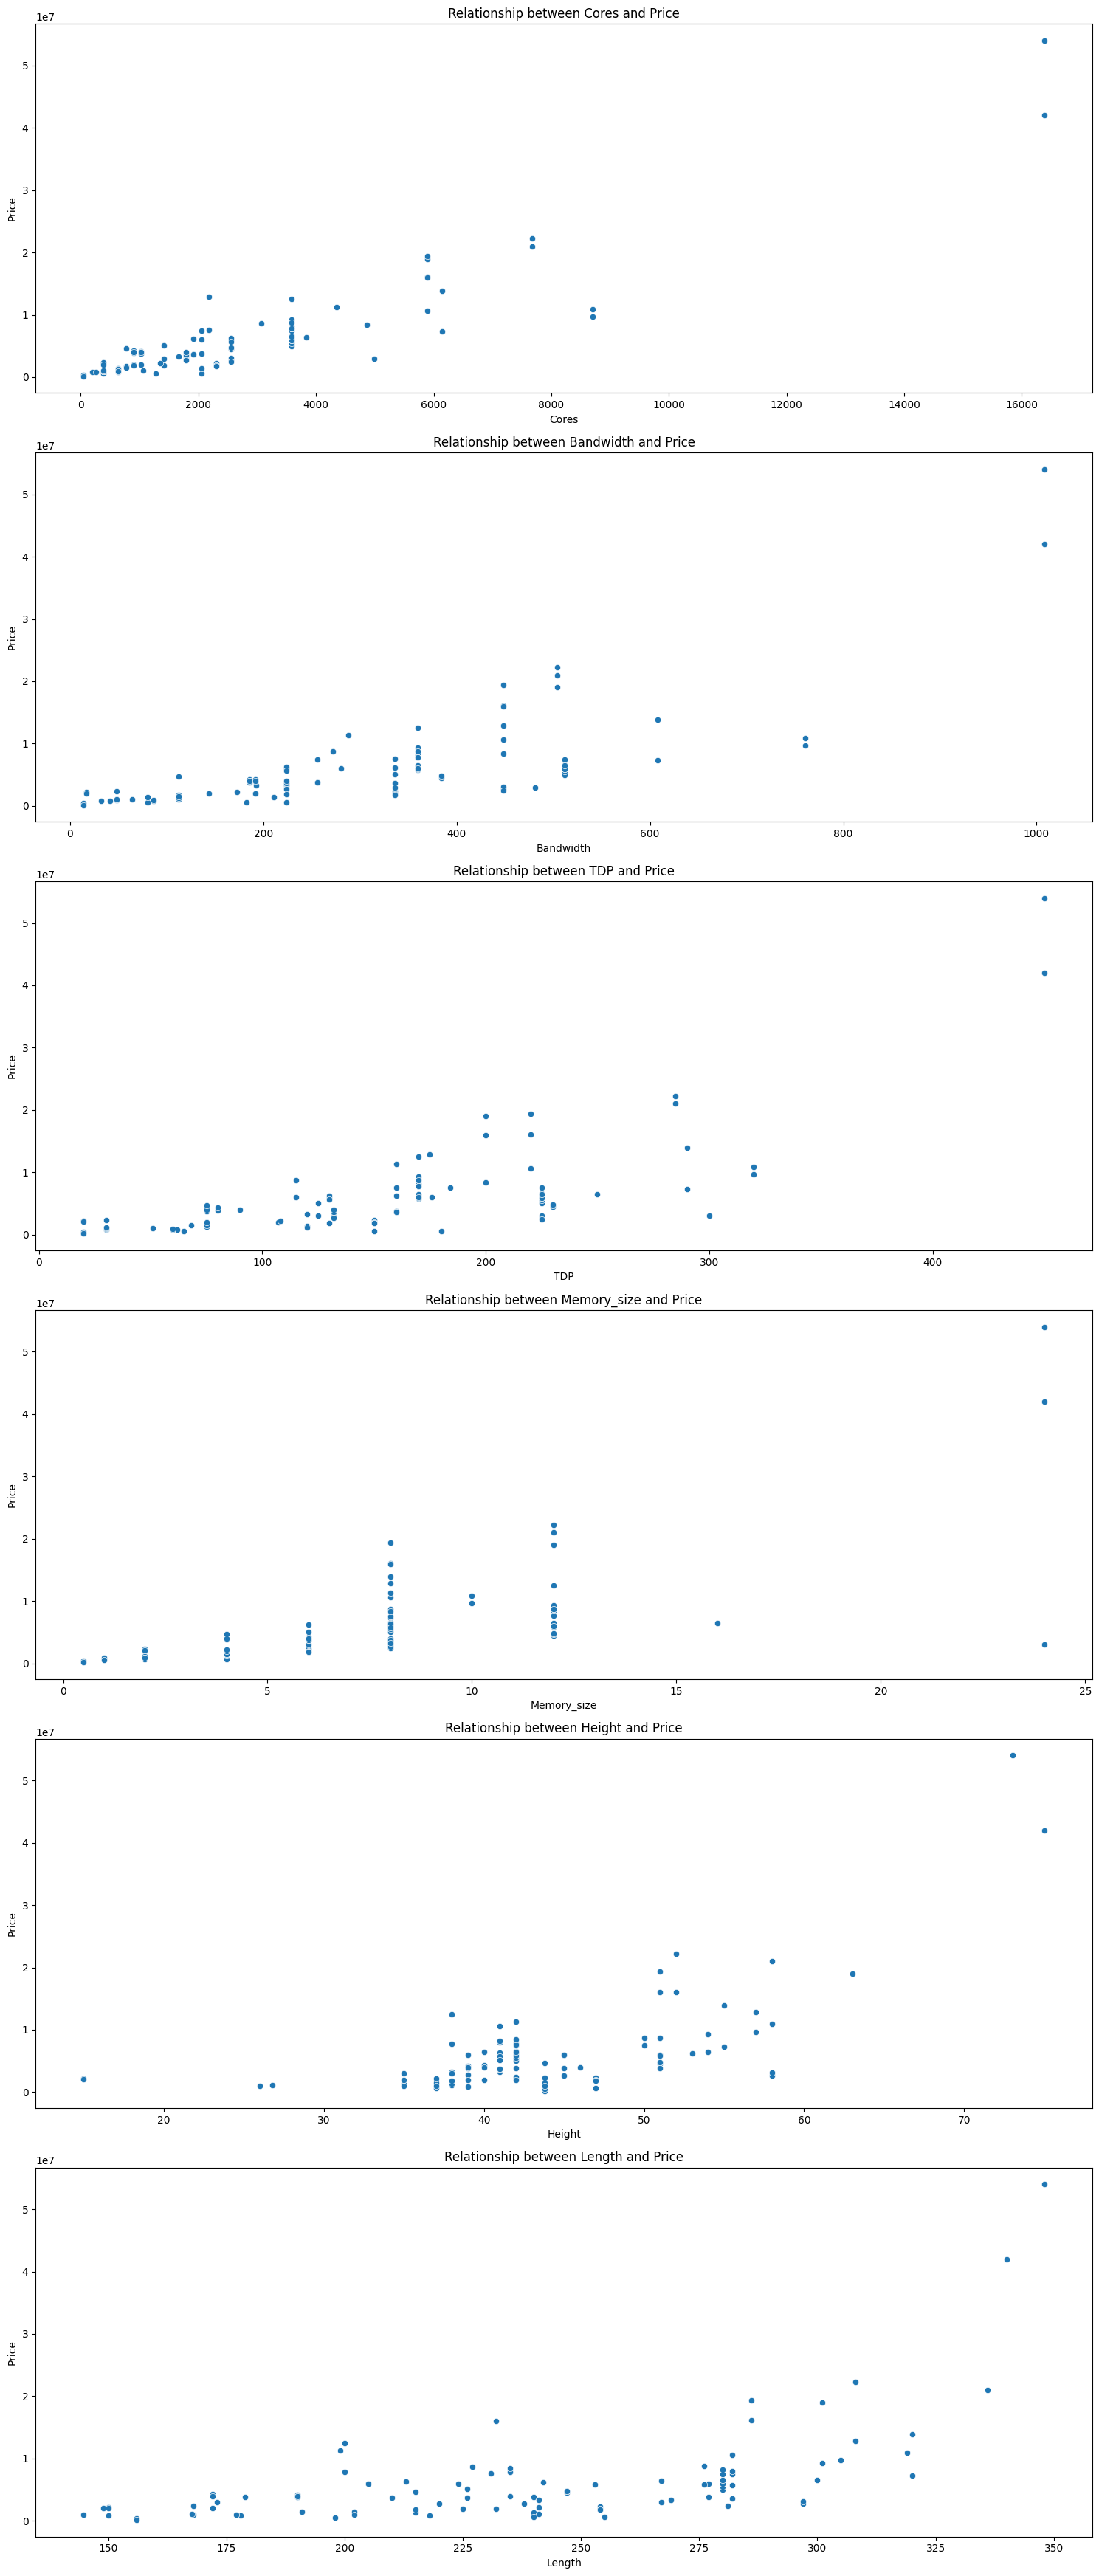

Price          1.000000
Cores          0.904742
Bandwidth      0.709036
TDP            0.696871
Memory_size    0.691851
Height         0.647530
Length         0.549826
Name: Price, dtype: float64

In [28]:
# Chọn ra các cột kiểu dữ liệu số
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Tìm các biến có tương quan cao với 'Price'
correlation_with_price = numeric_df.corr()['Price'].sort_values(ascending=False)

# Lọc ra các biến có tương quan đáng kể (ví dụ: |correlation| > 0.5)
significant_correlation = correlation_with_price[abs(correlation_with_price) > 0.5]

# Vẽ biểu đồ phân tán để xem xét mối quan hệ giữa 'Price' và các biến có tương quan đáng kể
plt.figure(figsize=(15, 5 * len(significant_correlation.index)))
for i, col in enumerate(significant_correlation.index[1:], 1):  # Loại bỏ 'Price' tự nó
    plt.subplot(len(significant_correlation.index) - 1, 1, i)
    sns.scatterplot(x=df[col], y=df['Price'])
    plt.title(f'Relationship between {col} and Price')
    plt.tight_layout()

plt.show()

significant_correlation

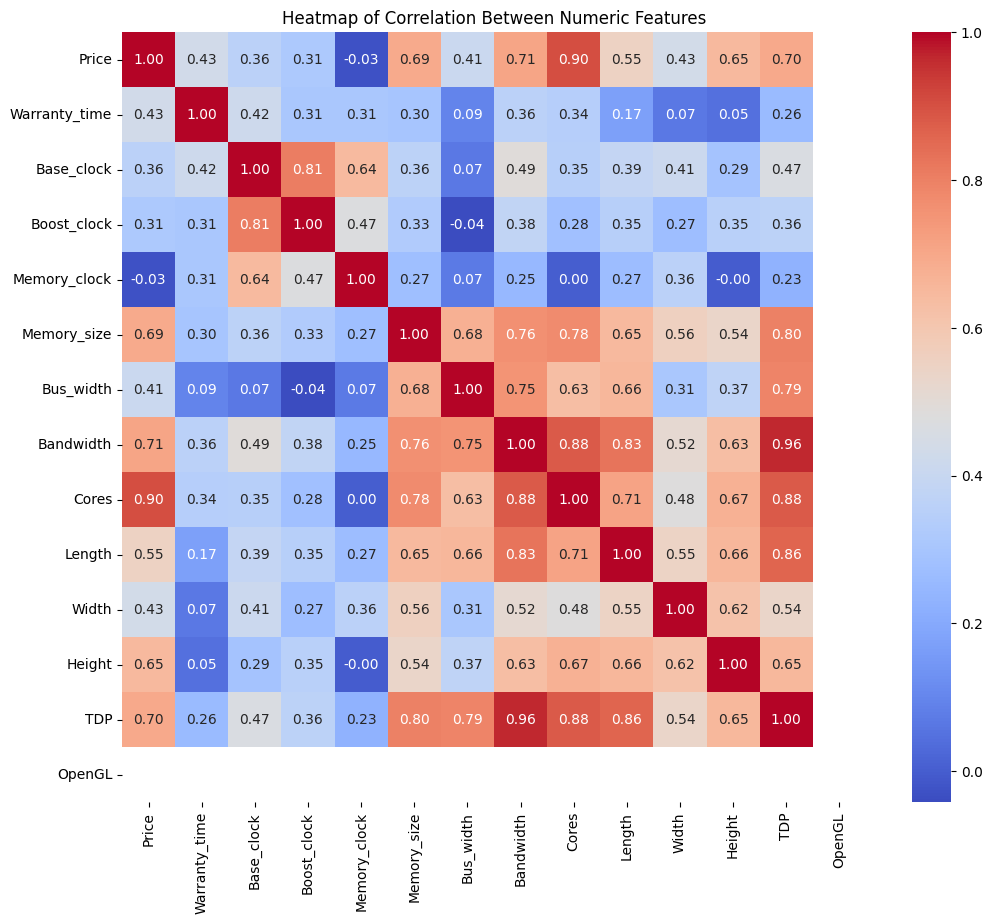

In [29]:
# Chọn các cột số lượng để phân tích mối quan hệ
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Vẽ biểu đồ tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Between Numeric Features')
plt.show()

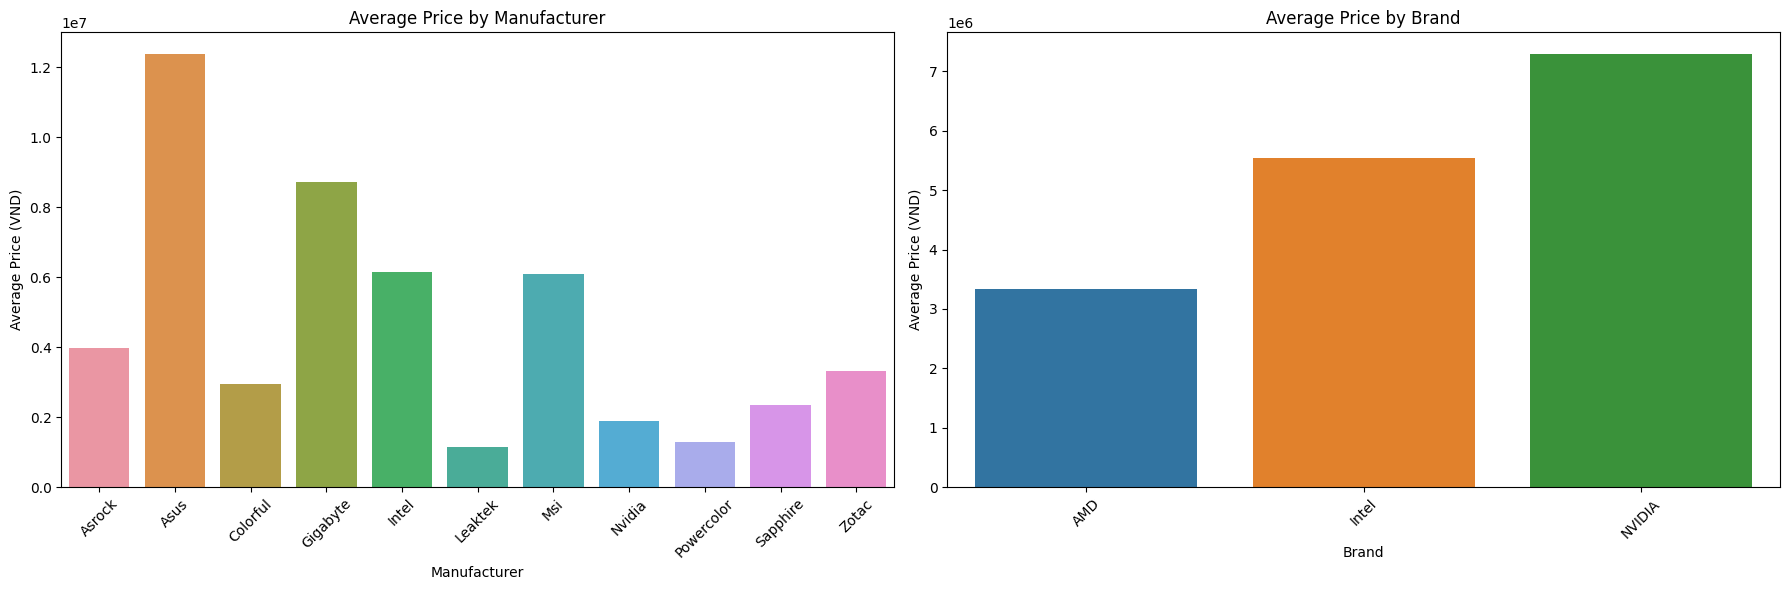

In [33]:
# Tính toán giá trung bình cho mỗi Nhà sản xuất và mỗi Brand
mean_price_by_manufacturer = df.groupby('Manufacturer')['Price'].mean().reset_index()
mean_price_by_brand = df.groupby('Brand')['Price'].mean().reset_index()

# Thiết lập biểu đồ matplotlib
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Vẽ biểu đồ giá trung bình theo Manufacturer
sns.barplot(x='Manufacturer', y='Price', data=mean_price_by_manufacturer, ax=axes[0])
axes[0].set_title('Average Price by Manufacturer')
axes[0].set_xlabel('Manufacturer')
axes[0].set_ylabel('Average Price (VND)')
axes[0].tick_params(axis='x', rotation=45)


# Vẽ biểu đồ giá trung bình theo Brand
sns.barplot(x='Brand', y='Price', data=mean_price_by_brand, ax=axes[1])
axes[1].set_title('Average Price by Brand')
axes[1].set_xlabel('Brand')
axes[1].set_ylabel('Average Price (VND)')
axes[1].tick_params(axis='x', rotation=45)

# Điều chỉnh layout để hiển thị tốt hơn
plt.tight_layout()

# Hiển thị các biểu đồ
plt.show()
